# **How grocery purchases affect Eduational Attainment**

The goal of this project is to understand how customers in London's boroughs make purchases, and how that affects educational attainment within the borough. With just under 3000 locations in the UK, Tesco is a multinational retailer of groceries and miscellaneous goods with around a 28% market share in the UK. It is an ideal source for analyzing customer buying habits because of its wide reach. We will be using The Tesco Grocery 1.0 Dataset for this project. 

[Link for the Tesco Grocery 1.0 Dataset](https://figshare.com/articles/dataset/Area-level_grocery_purchases/7796666?backTo=/collections/Tesco_Grocery_1_0/4769354)

The Tesco Grocery 1.0 Dataset, which was collected from Tesco Clubcard customers, serves as the basis for the analysis. This dataset, which combines demographic and geographic data with transactional data from Tesco locations for 2015, gives a broad insight into grocery purchasing habits. In order to compare the patterns in grocery consumption in different regions of London, the data for this study has been gathered at the borough level.

## **Preprocessing**

In [1]:
# importing necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import plotly.express as px

In [2]:
# loading the Tesco Grocery 1.0 dataset
grocery_data = pd.read_csv('/Users/s16teen/Downloads/Work/UOB/SEM2/ADS2/Tesco_Grocery_and_Educational_Attainment/Data/year_borough_grocery.csv')

grocery_data.head(1)

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E09000001,323.17475,35.0,150.0,250.0,400.0,1000.0,323.692596,1.00152,98.842963,...,103883,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.9,2305.862069


In [3]:
# loading the 'Statistical GIS Boundary Files for London' dataset
map_data = gpd.read_file("/Users/s16teen/Downloads/Work/UOB/SEM2/ADS2/Tesco_Grocery_and_Educational_Attainment/Data/Chorpleth Datasets/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")

map_data.head(1)

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."


In [4]:
# converting the datasets to pandas dataframes
grocery_data = pd.DataFrame(grocery_data)

In [5]:
# adding the names of the boroughs from the 'Statistical GIS Boundary Files for London' dataset
grocery_data = grocery_data.set_index('area_id').join(map_data.set_index('GSS_CODE')[['NAME']])

grocery_data = grocery_data.reset_index()

In [6]:
# displaying the first 5 rows of the dataset
grocery_data.head()

# convert the first 5 columns to a csv file (needed this for presentation)
# grocery_data = grocery_data.iloc[:5, :]
# grocery_data.to_csv('/Users/s16teen/Downloads/Work/UOB/SEM2/ADS2/Tesco_Grocery_and_Educational_Attainment/Data/grocery_data.csv')

# remove the city of london from the dataset
#grocery_data = grocery_data[grocery_data['NAME'] != 'City of London']


,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,NAME
0,E09000001,323.174750,35.0,150.0,250.0,400.0,1000.0,323.692596,1.001520,98.842963,...,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069,City of London
1,E09000002,421.304125,32.5,165.6,300.0,500.0,1500.0,597.994271,0.828993,122.341294,...,203101.0,99442.0,103659.0,60281.0,123180.0,19640.0,33.017321,36.09,5627.625381,Barking and Dagenham
2,E09000003,407.170491,40.0,180.0,320.0,500.0,1160.0,443.644324,0.171615,114.933771,...,378778.0,186357.0,192421.0,88754.0,237036.0,52988.0,37.195582,86.76,4365.813739,Barnet
3,E09000004,359.544126,30.0,144.0,255.0,450.0,1000.0,476.576945,0.819748,106.446426,...,242387.0,116814.0,125573.0,56028.0,146237.0,40122.0,38.880749,60.58,4001.105976,Bexley
4,E09000005,434.324141,40.0,175.0,325.0,500.0,1500.0,616.087316,0.354492,128.930369,...,323443.0,163939.0,159504.0,75033.0,211885.0,36525.0,35.766416,43.28,7473.267098,Brent


## **Task 1: Describe the Dataset**

In this task you need to describe the dataset. It contains many fields. A good description will find ways
to group fields together to summarise the content rather than simply list all the fields. You need to
explain the value of the data rather than only provide basic description. You should also address any
assumptions or limitations that need to be considered which may affect how the data can or should be used.

### **Basic Summary of the Tesco Dataset**

In [7]:
# finding the shape of the dataset
grocery_data.shape

(33, 203)

In [8]:
# finding if there are any missing values in the dataset
grocery_data.isnull().sum().sum()

np.int64(0)

In [9]:
# displaying the first few rows of the dataset
grocery_data.head()

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,NAME
0,E09000001,323.174750,35.0,150.0,250.0,400.0,1000.0,323.692596,1.001520,98.842963,...,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069,City of London
1,E09000002,421.304125,32.5,165.6,300.0,500.0,1500.0,597.994271,0.828993,122.341294,...,203101.0,99442.0,103659.0,60281.0,123180.0,19640.0,33.017321,36.09,5627.625381,Barking and Dagenham
2,E09000003,407.170491,40.0,180.0,320.0,500.0,1160.0,443.644324,0.171615,114.933771,...,378778.0,186357.0,192421.0,88754.0,237036.0,52988.0,37.195582,86.76,4365.813739,Barnet
3,E09000004,359.544126,30.0,144.0,255.0,450.0,1000.0,476.576945,0.819748,106.446426,...,242387.0,116814.0,125573.0,56028.0,146237.0,40122.0,38.880749,60.58,4001.105976,Bexley
4,E09000005,434.324141,40.0,175.0,325.0,500.0,1500.0,616.087316,0.354492,128.930369,...,323443.0,163939.0,159504.0,75033.0,211885.0,36525.0,35.766416,43.28,7473.267098,Brent


In [10]:
# Basic statistics of the dataset
grocery_data.describe()

,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,...,3.300000e+01,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,373.898533,35.954545,159.969697,284.581818,469.212121,1113.939394,434.344901,0.422137,109.808642,11.848485,...,1.641727e+06,262634.242424,130472.909091,132161.333333,59143.484848,173158.060606,30332.696970,36.253457,47.650909,7286.526000
std,40.721303,4.051164,16.896088,32.326396,39.005414,175.605015,96.926163,0.241992,10.405026,1.598851,...,1.139058e+06,73791.635356,36906.723911,37158.195707,19011.948712,49417.623844,11368.467277,2.498356,32.714349,3887.905684
min,295.330271,28.000000,120.000000,215.000000,400.000000,1000.000000,300.762891,0.171615,95.006632,10.100000,...,1.038830e+05,6687.000000,3697.000000,2990.000000,1018.000000,4349.000000,1320.000000,31.514726,2.900000,2166.664447
25%,348.420414,32.500000,150.000000,250.000000,450.000000,1000.000000,359.841786,0.271506,102.882176,11.000000,...,7.342320e+05,227507.000000,113683.000000,113824.000000,46242.000000,146237.000000,23417.000000,34.858641,26.820000,4390.319972
50%,374.737951,37.000000,165.000000,300.000000,500.000000,1000.000000,425.267620,0.323224,106.446426,11.000000,...,1.485336e+06,268626.000000,134797.000000,135020.000000,61120.000000,179854.000000,28265.000000,35.934276,37.640000,5793.247521
75%,405.993196,40.000000,175.000000,305.000000,500.000000,1160.000000,486.498044,0.487412,114.933771,12.500000,...,2.612931e+06,319477.000000,154118.000000,159504.000000,70644.000000,211354.000000,36907.000000,37.195582,56.380000,10687.248787
max,450.349903,40.000000,180.000000,325.000000,500.000000,1500.000000,718.157462,1.001520,136.703561,15.000000,...,4.131210e+06,380070.000000,186357.000000,195765.000000,93166.000000,237511.000000,56804.000000,43.910124,150.140000,15268.926174


In [11]:
# calculate the overall female to male ratio across all boroughs
overall_ratio = grocery_data['female'].sum() / grocery_data['male'].sum()
print("Overall female to male ratio:", overall_ratio)

Overall female to male ratio: 1.0129408032225893


In [12]:
# top ten lowest population boroughs
grocery_data.nsmallest(10, 'population')["population"]

0       6687.0
19    158589.0
20    171609.0
12    182183.0
26    194124.0
28    199870.0
1     203101.0
23    205965.0
18    227507.0
32    238047.0
Name: population, dtype: float64

<mark>**Key Highlights from the dataset**</mark>

- The dataset contains information about each Borough. (We know theres 33 Boroughs and there are 33 rows in the datset)

- There are 202 columns, which will be grouped up and summarized to simplify the task.

- There are no missing values in the dataset.

- The dataset is thorough and includes summary statistics of each variable like the percentile of each variable, the standard deviation and the 95% confidence intervals.

- The average product weight is 374g.

- The average product volume is 110mL.

- Boroughs vary in population from 6,687 to 380,070.

- The population density ranges from 2,166 to 15,269 people/km².

<mark>**We can group up the columns and summarize each group**</mark>

*The main groups of focus are:*

- Nutrients 

- Product Charateristics

- Product Categories

- Purchase Behaviours

- Demographic Information

- Geographic Information

### **Nutrient information**

The dataset contains columns for the weight, amount of energy and entropy of each nutrient in the average product.

*These nutrients are:*

- Carbs: Total carbohydrates. (includes sugars)

- Sugar: Natural and added sugars.

- Fats: Total fat content. (includes saturated fat)

- Saturated Fats: Total saturated fat content

- Protein: Amount of protein.

- Fibre: Total fiber content.

- Salt: Total Salt content.

- Alcohol: Total alcohol content

These columns provides insight into the composition of food products purchased in different boroughs. This can help measure nutritional quality in different boroughs and the potential health implications.

***Lets try to find some insights for the Nutrients***

In [13]:
# finding the average of the nutrients columns
nutrients_cols = ['carb', 'sugar', 'fat', 'saturate', 'protein', 'fibre', 'salt', 'alcohol']
nutrient_avg = grocery_data[nutrients_cols].mean()

nutrient_avg

carb        17.967103
sugar       10.018118
fat          8.964480
saturate     3.527514
protein      5.299996
fibre        1.618842
salt         0.580529
alcohol      0.242141
dtype: float64

In [14]:
# finding which borough has the highest and lowest average protein content
print("Highest Protein Content in Average Product: ", grocery_data[grocery_data['protein'] == grocery_data['protein'].max()]['NAME'].values[0])
print("Lowest Protein Content in Average Product: ", grocery_data[grocery_data['protein'] == grocery_data['protein'].min()]['NAME'].values[0])

Highest Protein Content in Average Product:  Southwark
Lowest Protein Content in Average Product:  Newham


In [15]:
# finding which borough has the highest and lowest average sugar content
print("Highest Sugar Content in Average Product: ", grocery_data[grocery_data['sugar'] == grocery_data['sugar'].max()]['NAME'].values[0])
print("Lowest Sugar Content in Average Product: ", grocery_data[grocery_data['sugar'] == grocery_data['sugar'].min()]['NAME'].values[0])

Highest Sugar Content in Average Product:  Sutton
Lowest Sugar Content in Average Product:  Kensington and Chelsea


### **Product Charateristics**

The dataset has columns for the weight, volume, amount of calories and concentration of calories in the average product, measured in kcals and kcals/gram respectively. This information can be useful to find boroughs with high-energy and low-energy diets.

***Lets try to find some insights for the Energy***

In [16]:
# finding which borough has the highest and lowest calorie values
print("Highest Calorie Content in Average Product: ", grocery_data[grocery_data['energy_tot'] == grocery_data['energy_tot'].max()]['NAME'].values[0])
print("Lowest Calorie Content in Average Product: ", grocery_data[grocery_data['energy_tot'] == grocery_data['energy_tot'].min()]['NAME'].values[0])

Highest Calorie Content in Average Product:  Havering
Lowest Calorie Content in Average Product:  City of London


In [17]:
# finding which borough has the highest and lowest weight values
print("Highest Weight in Average Product: ", grocery_data[grocery_data['weight'] == grocery_data['weight'].max()]['NAME'].values[0])
print("Lowest Weight in Average Product: ", grocery_data[grocery_data['weight'] == grocery_data['weight'].min()]['NAME'].values[0])

Highest Weight in Average Product:  Newham
Lowest Weight in Average Product:  Sutton


In [18]:
# finding which borough has the highest and lowest volume values
print("Highest Volume in Average Product: ", grocery_data[grocery_data['volume'] == grocery_data['volume'].max()]['NAME'].values[0])
print("Lowest Volume in Average Product: ", grocery_data[grocery_data['volume'] == grocery_data['volume'].min()]['NAME'].values[0])

Highest Volume in Average Product:  Newham
Lowest Volume in Average Product:  Kingston upon Thames


<mark>**We can see from this that the weight and volume of the average product being higher doesn't necessarily correlate to more calories in the average product.**</mark>

### **Product Categories**

The dataset records the proportion of different food and beverage types purchased.

*The different categories are:*

- Beer

- Dairy

- Eggs

- Fats & Oils

- Fish

- Fruits & Vegetables

- Grains

- Red Meat

- Poultry

- Readymade Foods

- Sauces

- Soft Drinks

- Spirits

- Sweets

- Tea & Coffee

- Water

- Wine

These categories are important as we can see which boroughs buy alot of products that are either 'junk food' or 'healthy food', and this can help us find healthy boroughs.

***Lets try to find some insights for the Product Categories***

In [19]:
# finding boroughs with most and least junk food consumption
junk_food_cols = ['f_beer', 'f_soft_drinks', 'f_spirits', 'f_sweets', 'f_wine']
grocery_data['junk_food'] = grocery_data[junk_food_cols].sum(axis=1)

print("Borough that buys the most junk food: ", grocery_data[grocery_data['junk_food'] == grocery_data['junk_food'].max()]['NAME'].values[0])
print("Borough that buys the least junk food: ", grocery_data[grocery_data['junk_food'] == grocery_data['junk_food'].min()]['NAME'].values[0])

Borough that buys the most junk food:  Sutton
Borough that buys the least junk food:  Kensington and Chelsea


In [20]:
# finding boroughs with most and least healthy food consumption
healthy_food_cols = ['f_eggs', 'f_fruit_veg', 'f_fish', 'f_meat_red', 'f_poultry']
grocery_data['healthy_food'] = grocery_data[healthy_food_cols].sum(axis=1)

print("Borough that buys the most healthy food: ", grocery_data[grocery_data['healthy_food'] == grocery_data['healthy_food'].max()]['NAME'].values[0])
print("Borough that buys the least healthy food: ", grocery_data[grocery_data['healthy_food'] == grocery_data['healthy_food'].min()]['NAME'].values[0])

Borough that buys the most healthy food:  Kensington and Chelsea
Borough that buys the least healthy food:  Sutton


<mark>**Something interesting to note is that Kensignton and Chelsea have the highest consumption of foods that are considered healthy and lowest consumption of foods that are considered unhealthy. The same, but opposite, for Sutton which have high junk food consumption and low healthy food consumption**</mark>

### **Purchase Behaviours**

This group includes metrics on the number of transactions, frequency of purchases, and consumer participation rates. The diversity of product weights and transaction days highlights purchasing patterns, which can be useful for market analysis and public health studies.

***Lets try to find some insights for the Purchase Behaviours***

In [21]:
# finding boroughs with the most and least transactions
print("Borough with most transactions: ", grocery_data[grocery_data['num_transactions'] == grocery_data['num_transactions'].max()]['NAME'].values[0])
print("Borough with least transactions: ", grocery_data[grocery_data['num_transactions'] == grocery_data['num_transactions'].min()]['NAME'].values[0])

Borough with most transactions:  Barnet
Borough with least transactions:  City of London


In [22]:
# finding boroughs with the most transactions per day
grocery_data['avg_transactions_per_day'] = grocery_data['num_transactions'] / grocery_data['transaction_days']
grocery_data[['NAME', 'avg_transactions_per_day']].sort_values(by='avg_transactions_per_day', ascending=False).head()

,NAME,avg_transactions_per_day
2,Barnet,158974.041096
9,Enfield,136756.597260
30,Waltham Forest,126876.578082
27,Southwark,111131.008219
21,Lambeth,91504.172603


### **Demographic Information**

Population statistics, including age distribution and gender, are given in the dataset and provide a broader context for understanding dietary and healthiness trends. The average age and population structure help correlate food consumption with demographic factors.

***Lets try to find some insights for the Demographic Information***

In [23]:
print(grocery_data['female'].sum())
print(grocery_data['male'].sum())

4361324.0
4305606.0


In [24]:
# finding boroughs with more females than males
grocery_data['fem_ratio'] = grocery_data['female'] / (grocery_data['male'])
female_majority = grocery_data[['NAME', 'fem_ratio']].sort_values(by='fem_ratio', ascending=False).head(5)
print("Boroughs with More Females than Males:\n", female_majority)

Boroughs with More Females than Males:
           NAME  fem_ratio
15    Havering   1.082585
5      Bromley   1.081619
3       Bexley   1.074982
31  Wandsworth   1.072938
7      Croydon   1.062180


In [25]:
# finding the boroughs with the lowest average ages
grocery_data[['NAME', 'avg_age']].sort_values(by='avg_age', ascending=True).head()

,NAME,avg_age
29,Tower Hamlets,31.514726
24,Newham,32.038272
11,Hackney,32.973528
1,Barking and Dagenham,33.017321
27,Southwark,34.200656


In [26]:
# finding the boroughs with the highest average ages
grocery_data[['NAME', 'avg_age']].sort_values(by='avg_age', ascending=False).head()

,NAME,avg_age
0,City of London,43.910124
15,Havering,40.051188
5,Bromley,39.853429
19,Kensington and Chelsea,38.888473
3,Bexley,38.880749


### **Geographic Information**

Columns for the area size, population density, and customer representativeness are in the dataset and help us get further explainations for the borough shopping trends.

***Lets try to find some insights for the Geographic Information***

In [27]:
# finding most densely populated areas
dense_areas = grocery_data[['NAME', 'people_per_sq_km']].sort_values(by='people_per_sq_km', ascending=False).head(5)
print("Most Densely Populated Boroughs:\n", dense_areas)

Most Densely Populated Boroughs:
                       NAME  people_per_sq_km
18               Islington      15268.926174
29           Tower Hamlets      14877.367089
11                 Hackney      14078.930818
19  Kensington and Chelsea      13095.706028
21                 Lambeth      11958.836689


In [28]:
# finding the boroughs with the highest population 
grocery_data[['NAME', 'population']].sort_values(by='population', ascending=False).head()

,NAME,population
7,Croydon,380070.0
2,Barnet,378778.0
8,Ealing,344285.0
24,Newham,336254.0
9,Enfield,328738.0


In [29]:
# finding areas with highest Clubcard participation (better customer data)
high_representativeness = grocery_data[['NAME', 'representativeness_norm']].sort_values(by='representativeness_norm', ascending=False).head(33)
print("Boroughs with Highest Clubcard Representativeness:\n", high_representativeness)

Boroughs with Highest Clubcard Representativeness:
                       NAME  representativeness_norm
0           City of London                 1.000000
14                  Harrow                 0.747110
2                   Barnet                 0.720439
30          Waltham Forest                 0.701978
9                  Enfield                 0.679551
27               Southwark                 0.583194
12  Hammersmith and Fulham                 0.560939
22                Lewisham                 0.538372
21                 Lambeth                 0.526050
8                   Ealing                 0.519101
24                  Newham                 0.512230
29           Tower Hamlets                 0.485199
13                Haringey                 0.482648
25               Redbridge                 0.452349
4                    Brent                 0.450625
23                  Merton                 0.403628
10               Greenwich                 0.393502
19  Kensingt

### **Limitations**

- Incomplete Coverage of Food Purchases: The dataset does not include purchases from other supermarket chains, or small stores [4].

- Excludes Non-Clubcard & Online Purchases: Information about Tesco customers who do not use a Clubcard or shop online are missing from the dataset [4].

- No Data on Restaurant/Takeaway Food: The dataset does not account for food consumed outside the home, which forms a large part of the average persons diet [4].

- Area Level Consumption: Nutritional values are based on an area-level average rather than individual-level consumption, limiting personal dietary insights [4].

- Low Data Representation in Some Areas: Certain boroughs have less Tescos, making data unreliable for those locations [4].

- The dataset is limited to the year 2015.

### **Assumptions**

- The dataset assumes that the general shopping behavior for each of the boroughs is represented by the purchasing patterns of Tesco Clubcard owners.

- The average product purchase reflects actual dietary and health patterns.

- All food categories are equally likely to be purchased.

- The data collected is accurate.

### **Biases**

- Self-Selection Bias: The dataset includes only Tesco Clubcard holders, meaning the sample is not random but self-selected [4].

- Demographic & Socio-Economic Bias: The data does not fully represent the population in terms of age, income, or social background [4].

- Geographic Bias: Some areas have higher Tesco store concentration (North London), leading to unequal data representation across boroughs [4].

- Purchase Behavior Bias: The dataset only captures Tesco shopping habits, excluding preferences of people who primarily shop elsewhere [4].

## **Task 2: Visualise the Dataset**
In this task you will explore the dataset and use one or more appropriate visualisations to extract two
useful insights from it. You are free to choose both the topics for exploration. The visualisations should
conform with the best practice you studied in Semester 1. You are free to create programs and use any
libraries or other tools to assist you in this task. You are also encouraged to make use of the skills you
have developed in other units such as statistical methods or machine learning approaches where you
consider these appropriate.

### **Correlation between categories**
We can use a correlation matrix to show how strongly each product category is related to eachother. 

Let's create a correlation matrix to see how all the fractions of product categories are related to eachother, as well as how they relate to the total number of calories in the average product and the "h_nutrients_calories_norm" column.

The "h_nutrients_calories_norm" column measures how evenly the calories in the average product is distributed across different nutrients (e.g., carbs, fat, protein), normalized to [0,1]

- Higher entropy (closer to 1): The calories in an area's average product are evenly spread across different nutrients.
- Lower entropy (closer to 0): Calories come mostly from one or a few dominant nutrients.

A balanced nutritional intake is vital for children and adolescents to maintain healthy development as well as for the prevention and management of chronic disorders [5]. Using the "h_nutrients_calories_norm" column we can find which categories of food, when purchased in a higher quantity, leads to a more balanced diet.

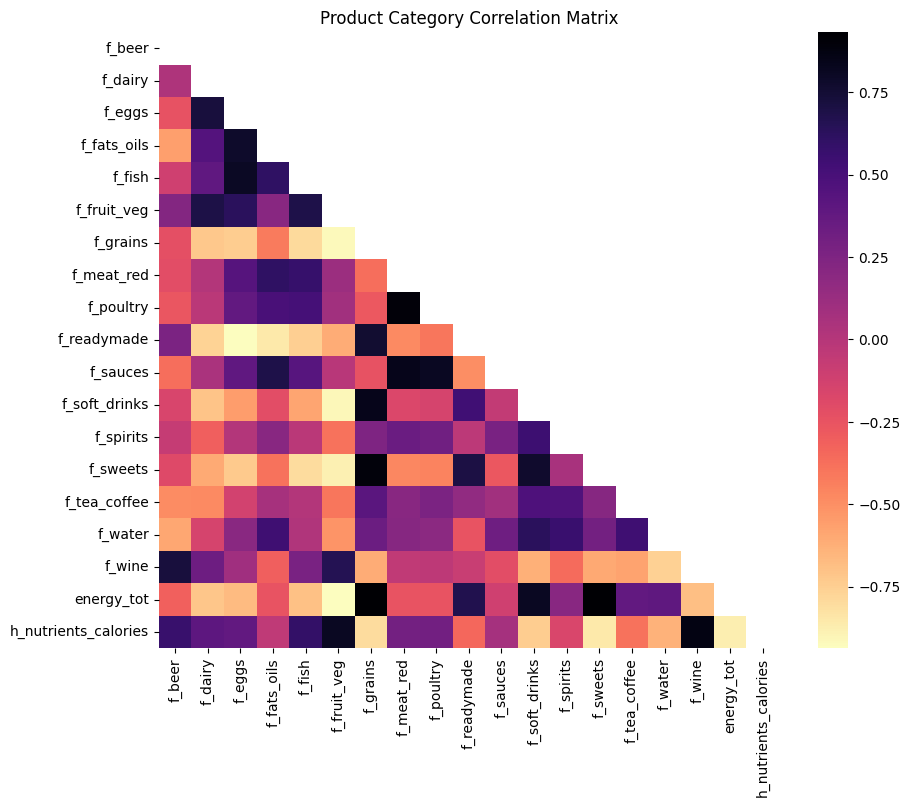

In [30]:
# save column names into a list
categories = ["f_beer", "f_dairy", "f_eggs", "f_fats_oils", "f_fish", "f_fruit_veg", 
              "f_grains", "f_meat_red", "f_poultry", "f_readymade", "f_sauces", "f_soft_drinks", 
              "f_spirits", "f_sweets", "f_tea_coffee", "f_water", "f_wine","energy_tot", "h_nutrients_calories"]

#categories = ["fat", "protein", "carb", "sugar", "fibre", "salt", "alcohol", "h_nutrients_calories"]
# create a correlation matrix
correlation_matrix = grocery_data[categories].corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap='magma_r')
plt.title('Product Category Correlation Matrix')
plt.show()

#### **High Correlation**

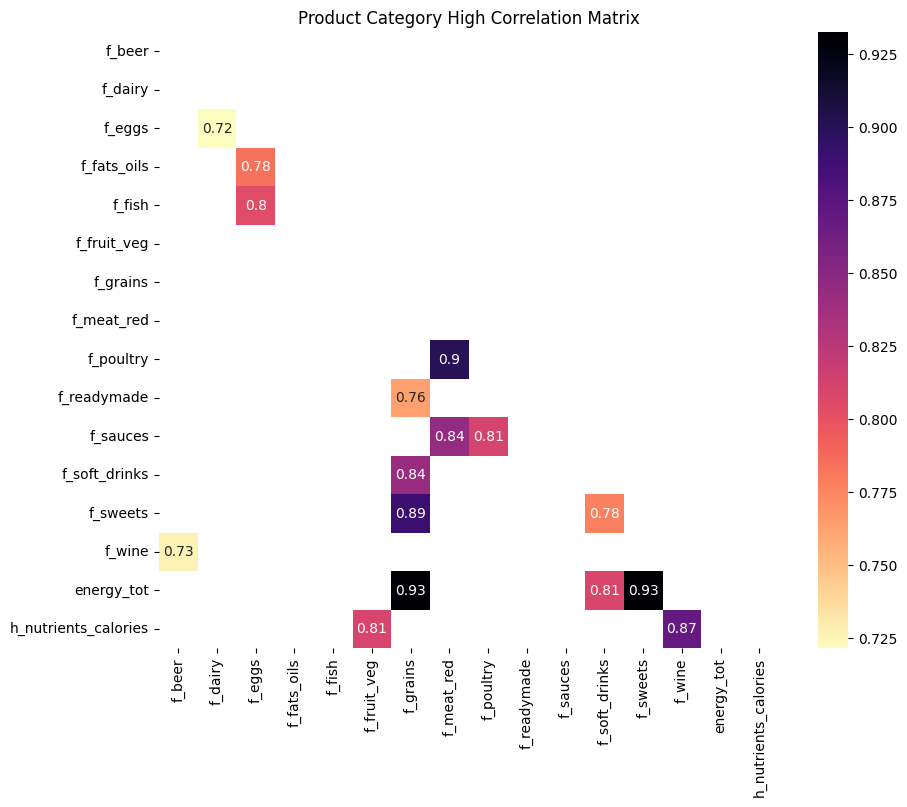

In [31]:
# highlight categories with very high correlation
high_correlation = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix != 1)]

# remove columns with no high correlation
high_correlation = high_correlation.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(high_correlation, dtype=bool))

# display the high correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(high_correlation, cmap='magma_r',mask=mask, annot=True)
plt.title('Product Category High Correlation Matrix')
plt.show()

<mark>**Key Highlights for highly correlated features**</mark>

- Fruits, Vegetables and Wine are highly correlated with "h_nutrients_calories". This means boroughs buying more fruits & veggies and more wine tend to have a more balanced intake of nutrients. This makes sense for fruits & veggies as they are inherently healthy foods with lots of healthy nutrients. Wine is interesting as its not considered a healthy food, but the correlation matrix shows that people who buy more wine, may buy more healhtier foods. People who drank wine consumed more fruit and vegetables and fewer red or fried meats, according to a U.S. study. They also consumed more fiber and less alcohol, saturated fat, and cholesterol than those who drank other forms of alcohol [6].

- Sweets, Soft Drinks and Grains are highly correlated with eachother and with total number of calories in the average product, which is expected as these categories are generally high in calories.

- Sauces have high correlation with red meats and poultry, which also makes sense as a lot of sauces are designed for enhancing meat dishes.

- Fish and eggs are correlated with fats and oils, which makes sense as fish and eggs require oils or fats for cooking.

- The correlation between wine and beer suggests that alcohol consumption itself is the driving factor rather than people only choosing one type.

#### **Low Correlation**

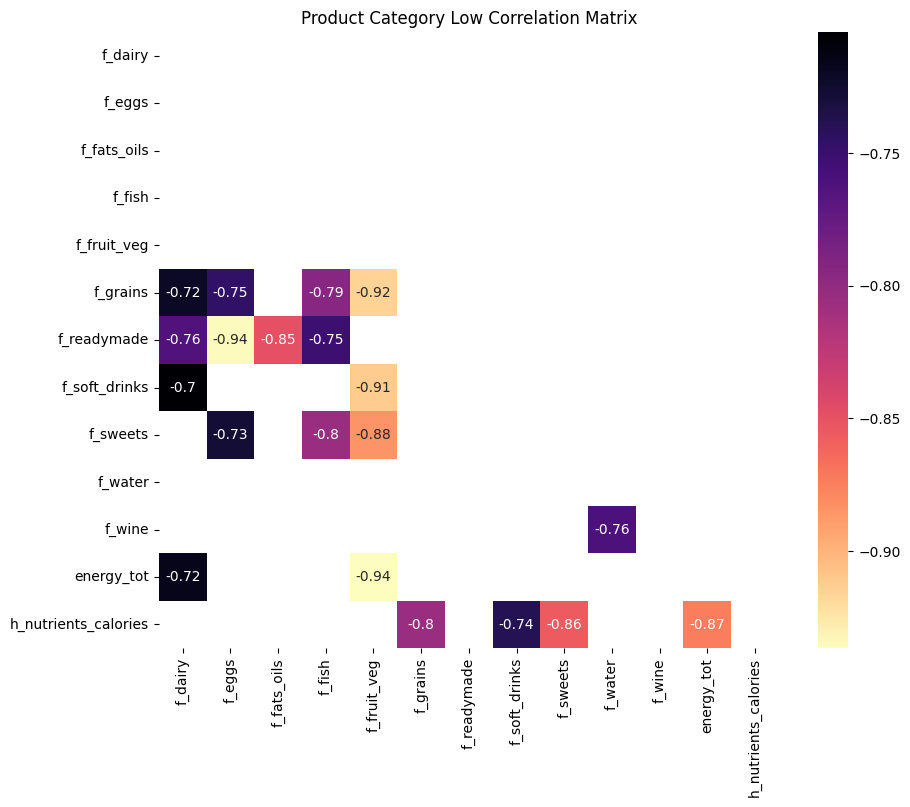

In [32]:
# highlight categories with very low correlation
low_correlation = correlation_matrix[correlation_matrix < -0.7]

# remove columns with no low correlation
low_correlation = low_correlation.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(low_correlation, dtype=bool))

# display the low correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(low_correlation, cmap='magma_r', mask=mask, annot=True)
plt.title('Product Category Low Correlation Matrix')
plt.show()

<mark>**Key Highlights for low correlated features**</mark>

- The total amount of calories in the average product and the "h_nutrients_calories" are strongly negatively correlated. Which means the more calories in the product, means the less balanced intake of nutrients. This is understood as we know theres a correlation between sweets and soft drinks and total calories, and that sweets and softdrinks are also negatively correlated with "h_nutrients_calories".

- Water and wine are negatively correlated, but this is not as important of an insight because people in the UK drink tap water generally, thus the "f_water" column may not reflect hydration habits.

- Fruits & vegetables are strongly negatively correlated with total calories in the average product, which makes sense as fruits & vegetables are quite low in calories. Theres also strong negative correlation between fruits & vegetables and sweets, soft drinks and grains, which suggest people who buy more healthy items like fruits & veggies avoid the unhealthy sweets and soft drinks. The low correlation between fruits & vegetables and grains likely indicates that fruits & vegetables and grains are consumed differently across the population, possibly due to cultural dietary patterns, economic factors, or simply because they serve different purposes in a diet.

- Fats & oils and readymade foods are negatively correlated as well, which is obvious as fats and oils are used to cook meals from scratch, thus are not required for coustomers that buy alot of readymade meals. The same goes for eggs, fish and dairy products being negatively correlated with readymade foods.

### **Calorie trend for the year**

In [33]:
# creating a df that contains all the borough data by month for the tear 2015 sorted by each month
directory = "/Users/s16teen/Downloads/Work/UOB/SEM2/ADS2/Tesco_Grocery_and_Educational_Attainment/Data/year_borough_by_months"
dfs = []

# loop through all month files and convert to dataframe, with a new "month"" column
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    df = pd.read_csv(file_path)
    month = filename[:3].upper()
    
    # add the 'month' column to the dataframe
    df['month'] = month

    # append the dataframe to the list of dataframes
    dfs.append(df)

# combine all dataframes into one
grocery_data_monthly = pd.concat(dfs, ignore_index=True)

# sort the data by month
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
grocery_data_monthly['month'] = pd.Categorical(grocery_data_monthly['month'], categories=months, ordered=True)
grocery_data_monthly = grocery_data_monthly.sort_values('month')

grocery_data_monthly

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,month
296,E09000033,386.153344,40.0,170.0,300.0,500.0,1000.0,401.387253,1.034946,112.124035,...,238047.0,123356.0,114691.0,42610.0,167188.0,28249.0,37.157952,21.50,11071.953488,JAN
294,E09000031,416.766871,40.0,180.0,332.0,500.0,1200.0,470.812648,0.682288,123.377979,...,270671.0,135651.0,135020.0,65030.0,177768.0,27873.0,34.990623,38.86,6965.285641,JAN
293,E09000030,386.908312,35.0,165.0,300.0,500.0,1000.0,435.806245,0.825641,116.876336,...,293828.0,152762.0,141066.0,64797.0,211354.0,17677.0,31.514726,19.75,14877.367089,JAN
292,E09000029,310.172850,25.0,125.0,240.0,400.0,1000.0,335.289443,2.915323,102.481066,...,199870.0,97427.0,102443.0,46142.0,123600.0,30128.0,38.449162,43.80,4563.242009,JAN
291,E09000028,392.638336,38.0,180.0,325.0,500.0,1000.0,371.971749,0.567370,110.879104,...,308434.0,153470.0,154964.0,62902.0,221000.0,24532.0,34.200656,28.86,10687.248787,JAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,E09000020,393.154636,43.0,176.0,300.0,500.0,1000.0,390.403325,1.047508,102.797206,...,158589.0,78878.0,79711.0,28328.0,107647.0,22614.0,38.888473,12.11,13095.706028,DEC
348,E09000019,382.396100,39.0,168.0,300.0,500.0,1100.0,395.466499,1.062644,109.703208,...,227507.0,113683.0,113824.0,40109.0,167416.0,19982.0,34.484174,14.90,15268.926174,DEC
347,E09000018,359.411204,32.5,150.0,255.0,475.0,1000.0,368.076725,2.341923,109.819648,...,266412.0,134797.0,131615.0,62349.0,173737.0,30326.0,35.741397,55.95,4761.608579,DEC
353,E09000024,363.300586,32.5,150.0,250.0,468.0,1000.0,400.689694,1.578838,107.535826,...,205965.0,101313.0,104652.0,46260.0,134778.0,24927.0,36.593164,37.64,5471.971307,DEC


In [34]:
# group the data by borough and month, and sum the calories
grouped = grocery_data_monthly.groupby(['area_id', 'month']).sum().reset_index()

# add the borough names from the map dataframe
grouped = grouped.set_index('area_id').join(map_data.set_index('GSS_CODE')['NAME']).reset_index()

# create an interactive line chart
fig = px.line(grouped, x='month', y='energy_tot', color='NAME', markers=True, 
              title='Total calories in each borough by month in 2015',
              labels={'energy_tot': 'Total calories', 'month': 'Month', 'NAME': 'Borough'})

fig.update_layout(xaxis_tickangle=45, legend_title_text='Borough',
    plot_bgcolor='rgba(0,0,0,0)')
fig.show()


/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_51483/730383858.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = grocery_data_monthly.groupby(['area_id', 'month']).sum().reset_index()


In [35]:
# group the data by borough and month, and sum the calories
grouped = grocery_data_monthly.groupby(['month']).sum().reset_index()

# add the borough names from the map dataframe
grouped = grouped.set_index('area_id').join(map_data.set_index('GSS_CODE')['NAME']).reset_index()

# divide the total calories by the number of boroughs to get the average
grouped['energy_tot'] = grouped['energy_tot'] / 33

# create an interactive line chart
fig = px.line(grouped, x='month', y='energy_tot', markers=True,
              title='Total calories in all boroughs by month in 2015',
              labels={'energy_tot': 'Total calories', 'month': 'Month', 'NAME': 'Borough'}
              )

fig.update_layout(xaxis_tickangle=45, legend_title_text='Borough', plot_bgcolor='rgba(0,0,0,0)')
fig.show()

/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_51483/1790913524.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [36]:
# roup the data by borough and month, summing the calories
grouped = grocery_data_monthly.groupby(['month']).sum().reset_index()

# Add borough names from the map dataframe
grouped = grouped.set_index('area_id').join(map_data.set_index('GSS_CODE')['NAME']).reset_index()

# List of food categories to normalize
food_categories = ['energy_tot','h_nutrients_calories']

# Normalize each food category (min-max normalization)
for col in food_categories:
    grouped[col] = (grouped[col] - grouped[col].min()) / (grouped[col].max() - grouped[col].min())

# Melt the dataframe to create an interactive multi-line chart
grouped_melted = grouped.melt(id_vars=['month'], value_vars=food_categories, var_name='Food Category', value_name='Normalized Calories')

# Create the interactive line chart
fig = px.line(grouped_melted, x='month', y='Normalized Calories', color='Food Category', markers=True,
              title='Normalized Trends of Food Purchases by Month (2015)',
              labels={'month': 'Month', 'Normalized Calories': 'Scaled Value'})

fig.update_layout(xaxis_tickangle=45, legend_title_text='Food Category', plot_bgcolor='rgba(0,0,0,0)')
fig.show()

/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_51483/195776960.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<mark> **Key Highlights for total calories by month** </mark>

- The end of British Summer Time results in a significant reduction in outdoor physical activity due to decreased daylight hours. This suggests that while summer may encourage more outdoor activity, the transition out of summer can lead to a decline in physical activity levels [7]. This can be seen with our data, there is a decline in Calories mid-year, it drops from March to June, hitting the lowest points in June and July. This means people are buying products with calories in it in the summer, which could be related to the increase in outdoor activity and dieting before the summer. 

- There is a steep increase towards the end of the year, which could be due to the temperature dropping, which in turn leads people to want higher calorie foods (comfort foods, warm meals, etc.). Another reason is that people tend to buy alot more foods, especially alcohol, around the holiday season.

- January and February Show a Moderate Start, the calories are lower than the year-end but begin rising in February and March. This might be due to New Year's resolutions (healthier eating in January) but a return to normal habits after.

### **Trends Geographically**

In [37]:
# merge the grocery data with the map data

choropleth_data_grocery = map_data.set_index('GSS_CODE').join(df.set_index('area_id'))

choropleth_data_grocery.head(1)

,NAME,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,weight,weight_perc2.5,weight_perc25,...,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,month
GSS_CODE,,,,,,,,,,,,,,,,,,,,,
E09000021,Kingston upon Thames,3726.117,0.0,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",300.181329,30.0,125.0,...,171609.0,84301.0,87308.0,37534.0,111139.0,22936.0,37.072461,37.26,4605.716586,NOV


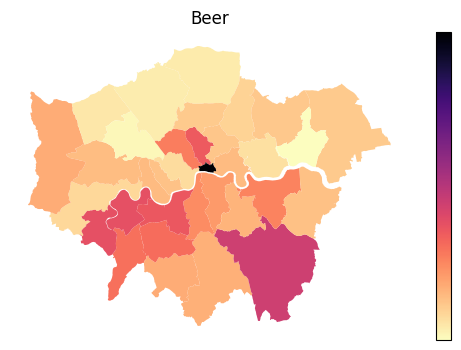

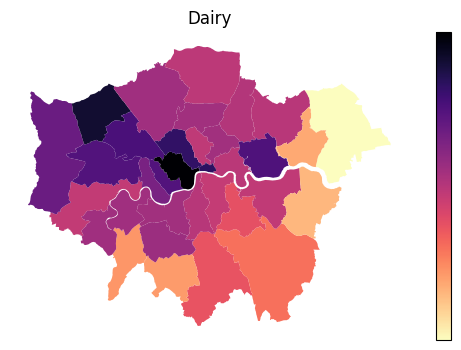

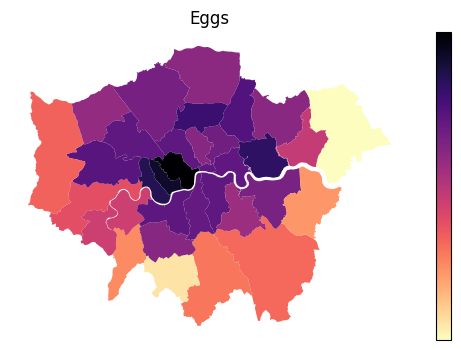

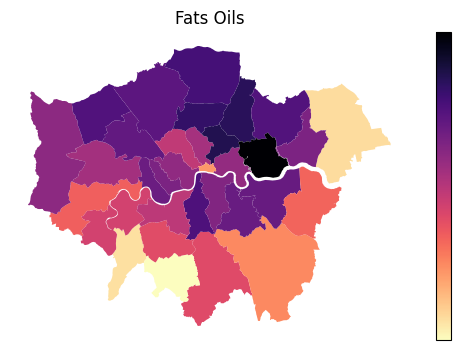

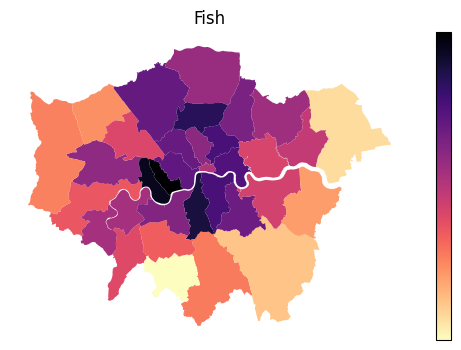

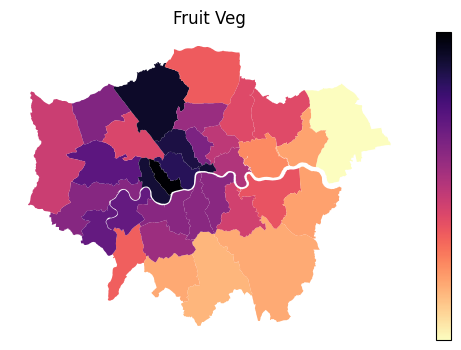

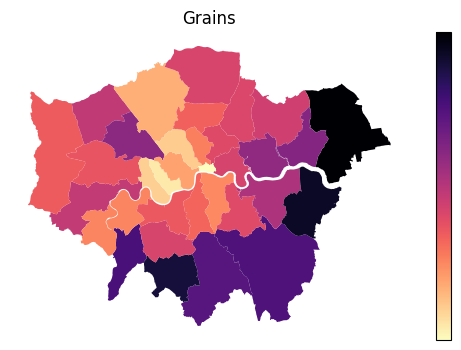

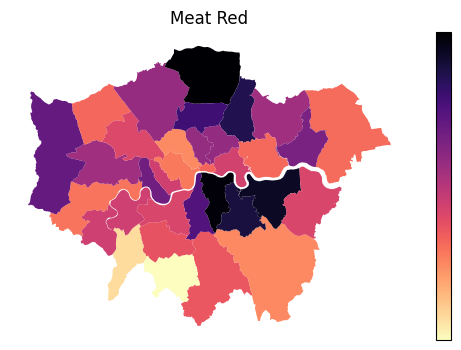

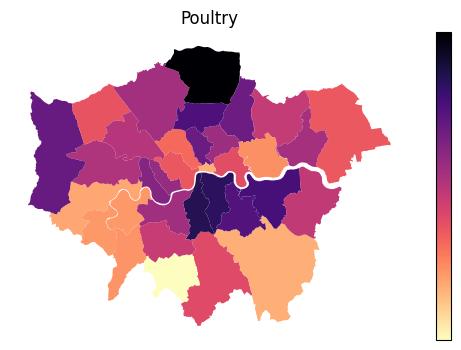

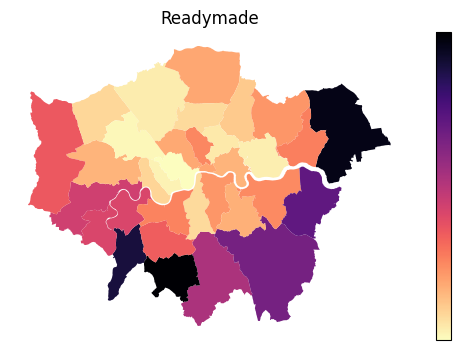

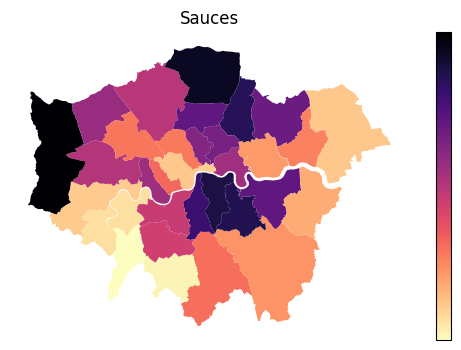

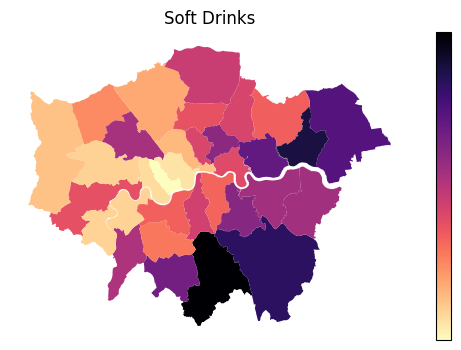

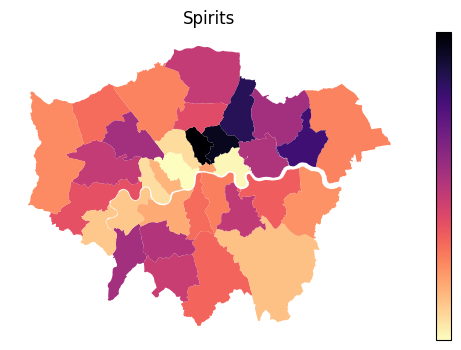

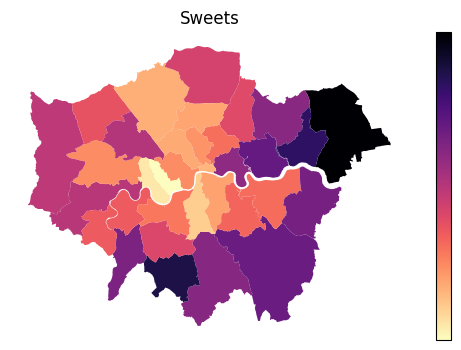

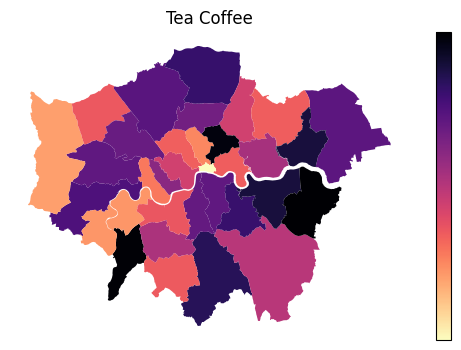

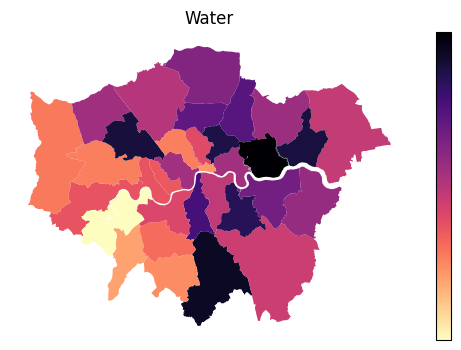

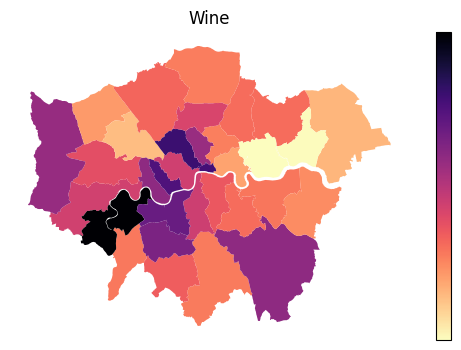

In [38]:
# create maps for a bunch of columns
columns = ['f_beer', 'f_dairy', 'f_eggs', 'f_fats_oils', 'f_fish', 'f_fruit_veg', 'f_grains', 'f_meat_red', 'f_poultry', 'f_readymade', 'f_sauces', 'f_soft_drinks', 'f_spirits', 'f_sweets', 'f_tea_coffee', 'f_water', 'f_wine']

for column in columns:
    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    choropleth_data_grocery.plot(column, ax=ax, legend=True, cmap='magma_r', legend_kwds={'ticks': []})
    ax.set_title(column[2:].replace("_", " ").title())
    ax.axis('off')
    plt.show()

<mark> **Key Highlights for borough category purchases** </mark>

- There is more red meat and poultry consumption near the north, since meat is a more expensive product, it could be a link with the income levels of the borough [9].

- In suburban areas, there is a greater consumption of prepared meals. It could be because people who live in these places commute longer, which means they have less time to prepare meals and purchase more prepared foods [9].

- Boroughs that buy alot of sweets also buy alot of soft drinks and grains, and buy less fruits and veggies, fish, and dairy.

- We can see that certain boroughs, especially near the west, buy alot more water when compared to the other boroughs, which could a cause of different boroughs having different tap water quality and taste.

***Finding insights for Fibre:***

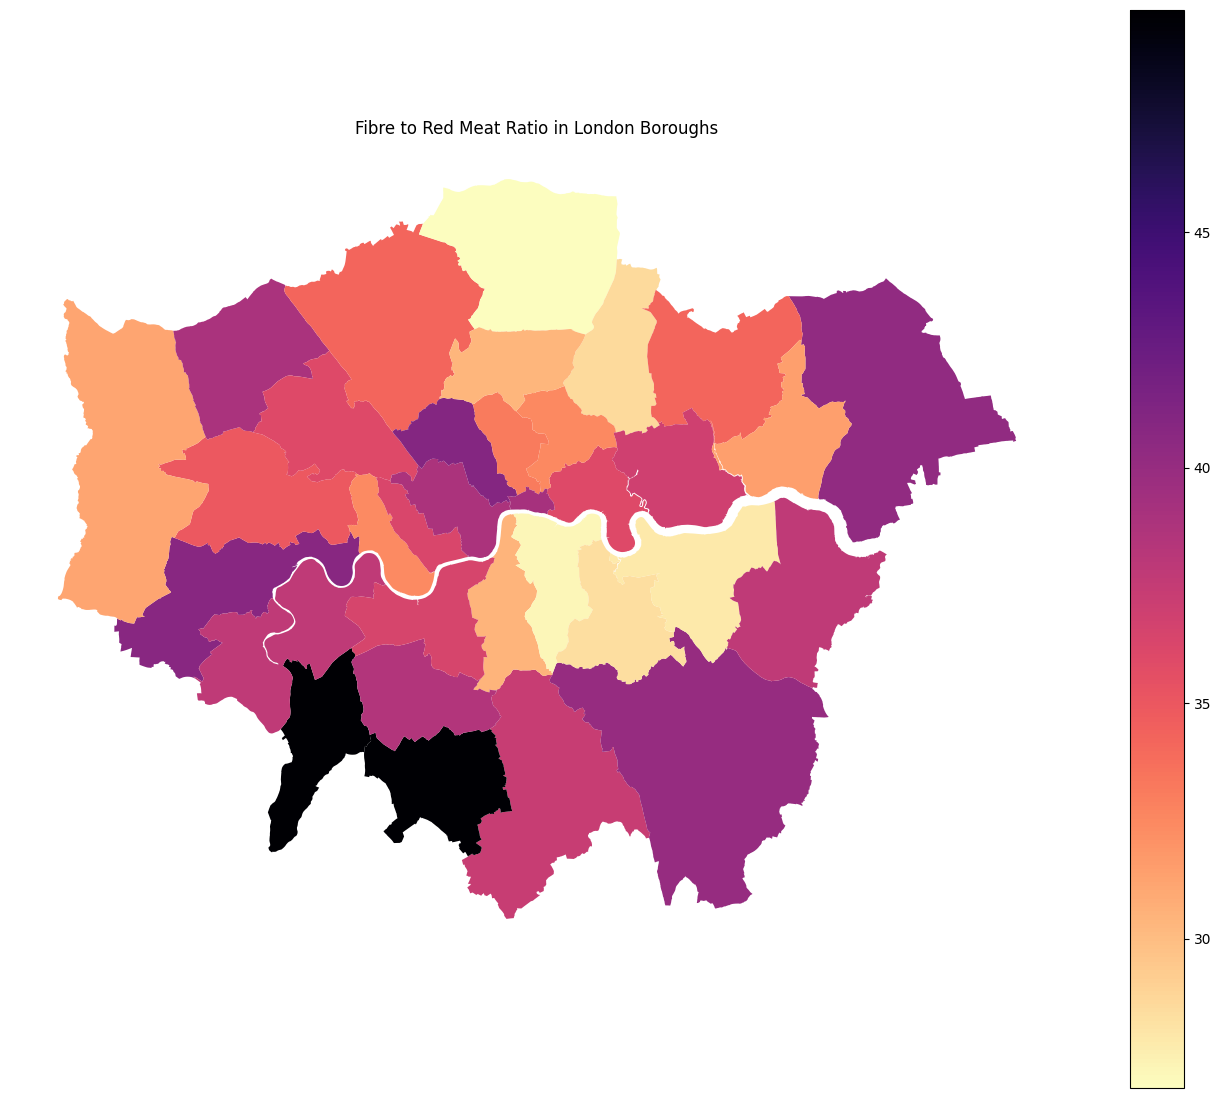

In [39]:
# create a column to find the boroughs that have high fibre intake as well as low red meat intake
choropleth_data_grocery['fibre_red_meat_ratio'] = choropleth_data_grocery['fibre'] / choropleth_data_grocery['f_meat_red']


# create a map for the fibre column
fig, ax = plt.subplots(1, 1, figsize=(17, 14))
choropleth_data_grocery.plot('fibre_red_meat_ratio', ax=ax, legend=True, cmap='magma_r')
# for x, y, label in zip(choropleth_data_grocery.geometry.centroid.x, choropleth_data_grocery.geometry.centroid.y, choropleth_data_grocery['NAME']):
#     ax.text(x, y, label, fontsize=8, ha='center', color='red')
#for x, y, label in zip(choropleth_data_grocery.geometry.centroid.x+5, choropleth_data_grocery.geometry.centroid.y, choropleth_data_grocery['fibre']):
    #ax.text(x, y, label, fontsize=8, ha='center', color='red')
ax.axis('off')
plt.title('Fibre to Red Meat Ratio in London Boroughs')
plt.show()

In [40]:
# top ten fibres to red meat ratio
top_fibre_red_meat = choropleth_data_grocery[['NAME', 'fibre_red_meat_ratio']].sort_values(by='fibre_red_meat_ratio', ascending=False).head(10)
print("Top Ten Boroughs with Highest Fibre to Red Meat Ratio:\n", top_fibre_red_meat)

# this column helps 


# top ten average capped scores in the dataset
#top_capped = [['NAME', 'capped_avg_score']].sort_values(by='capped_avg_score', ascending=False).head(10)

Top Ten Boroughs with Highest Fibre to Red Meat Ratio:
                            NAME  fibre_red_meat_ratio
GSS_CODE                                             
E09000029                Sutton             49.724538
E09000021  Kingston upon Thames             49.677865
E09000007                Camden             40.976078
E09000018              Hounslow             40.809721
E09000016              Havering             40.315965
E09000006               Bromley             40.060099
E09000001        City of London             39.094125
E09000015                Harrow             38.907825
E09000033           Westminster             38.854754
E09000024                Merton             38.541187


## **Task 3: Combining Datasets**

In this task, you will make use of an additional dataset that provides information about educational
attainment at school age. The first part of this task is to find a suitable dataset.

You should present a brief overview of the additional dataset and explain why it is suitable for
the task. You should also indicate any assumptions you are making.

Use the two datasets to identify any patterns in buying behaviour that appear related to educational
outcome. It will help you to focus your exploration if you conduct a brief literature review of the topic.
In presenting your conclusion you should relate it to the literature you have used.

You are free to identify where a pattern that might be expected is not present.
You are encouraged to consider working at the borough level for ease of matching the data.

### **Overview:**

This data shows the GCSE and equivalent by the borough for the year 2014-2015. It includes:

- The number of students finishing Key Stage 4. Key Stage 4 is the stage of education in the UK that covers students aged 14 to 16. This is when these students study for their GCSE exams. 

- The percentage of students achieving different levels of GCSE grades. This includes the percentage for 5 or more A*-C and 5 or more A*-G. 5 or more A*-C means the student has achieved at least five GCSEs with grades A, A, B, or C*, which are considered good grades. 5 or more A*-G means the student has achieved at least five GCSEs with grades A, A, B, C, D, E, F, or G*. This means they have passed at least five subjects at any grade level.

- The average scores students got in their GCSEs.

- Percentage of students took and passed both English and Maths at a Grade C or Above.


The dataset does not include data about the City of London borough, thus we will exclude it from our grocery dataset. The dataset is broken down by gender as well. 

<mark> ***Add reason why its a good dataset to use***</mark>

### **Assumptions**

- The dataset is accurate. 

- Borough level aggregation of GCSE results are meaningful representations of individual student performance in that borough.

- Since were only looking at the data for 2014-2015, we assume GCSE difficulty levels, grading standards, and assessment methods remain stable over time.

- The quality of the schools and teaching is the same for all the boroughs.

- External factors like their home environment and study habits are not the main drivers for educational attainment.

- The "Any passes" column of the dataset includes all students who achieved at least one GCSE or equivalent qualification.

### **Pre Processing + Exploratory Data Analysis**

In [41]:
# load in the dataset
education_data = pd.read_excel('/Users/s16teen/Downloads/Work/UOB/SEM2/ADS2/Tesco_Grocery_and_Educational_Attainment/Data/gcse-results-old.xls', sheet_name='2014-15')

# keep only whats required in our dataframe
education_data = education_data.iloc[4:36, :12]

# reset the index
education_data.reset_index(drop=True, inplace=True)

# rename the columns
education_data.columns = ['Code', 'Area', 'Num_Pupils', '5+A*-C', '5+A*-C_With_Eng_Maths', '5+A*-G', '5+A*-G_With_Eng_Maths', 'Any_Passes', 'Avg_Capped_Score', 'Avg_Score', 'A*-C_Eng_Maths_Entered', 'A*-C_Eng_Maths_Achieved']

# save the first 5 rows of the dataset to a csv file
#education_data.to_csv('/Users/s16teen/Downloads/Work/UOB/SEM2/ADS2/Tesco_Grocery_and_Educational_Attainment/Data/education_data.csv')

<mark> **For this dataset we will only consider the first 12 columns, as we do not require the split between boys and girls (our grocery data does not have the spending habits of boys and girls separately)** </mark>

<mark> **We also will only consider the rows from 4-35, as they are about the boroughs** </mark>

<mark> **Data for the City of London is missing, thus we will omit it from our grocery dataset and analysis** </mark>

In [42]:
# find if there are any missing values
education_data.isnull().sum().sum()

np.int64(0)

In [43]:
# find the types of data in the dataset
education_data.dtypes

Code                       object
Area                       object
Num_Pupils                 object
5+A*-C                     object
5+A*-C_With_Eng_Maths      object
5+A*-G                     object
5+A*-G_With_Eng_Maths      object
Any_Passes                 object
Avg_Capped_Score           object
Avg_Score                  object
A*-C_Eng_Maths_Entered     object
A*-C_Eng_Maths_Achieved    object
dtype: object

In [44]:
# find the average values for each of the columns
avg_values = education_data.iloc[:, 2:].mean()
avg_values

Num_Pupils                    2363.25
5+A*-C                         71.325
5+A*-C_With_Eng_Maths       61.015625
5+A*-G                        95.2375
5+A*-G_With_Eng_Maths       92.353125
Any_Passes                   98.23125
Avg_Capped_Score              326.575
Avg_Score                  393.640625
A*-C_Eng_Maths_Entered      96.078125
A*-C_Eng_Maths_Achieved     62.659375
dtype: object

In [45]:
# find the Areas with the highest and lowest values for each of the columns
for c in education_data.columns[2:]:
    education_data[c] = education_data[c].astype(float)
    print("Highest", c, "in Area: ", education_data[education_data[c] == education_data[c].max()]['Area'].values[0])
    print("Lowest", c, "in Area: ", education_data[education_data[c] == education_data[c].min()]['Area'].values[0])
    print()

Highest Num_Pupils in Area:  Enfield
Lowest Num_Pupils in Area:  Kensington and Chelsea

Highest 5+A*-C in Area:  Sutton
Lowest 5+A*-C in Area:  Lewisham

Highest 5+A*-C_With_Eng_Maths in Area:  Kingston upon Thames
Lowest 5+A*-C_With_Eng_Maths in Area:  Lewisham

Highest 5+A*-G in Area:  Westminster
Lowest 5+A*-G in Area:  Hammersmith and Fulham

Highest 5+A*-G_With_Eng_Maths in Area:  Westminster
Lowest 5+A*-G_With_Eng_Maths in Area:  Bexley

Highest Any_Passes in Area:  Westminster
Lowest Any_Passes in Area:  Wandsworth

Highest Avg_Capped_Score in Area:  Sutton
Lowest Avg_Capped_Score in Area:  Lewisham

Highest Avg_Score in Area:  Sutton
Lowest Avg_Score in Area:  Lewisham

Highest A*-C_Eng_Maths_Entered in Area:  Westminster
Lowest A*-C_Eng_Maths_Entered in Area:  Bexley

Highest A*-C_Eng_Maths_Achieved in Area:  Kingston upon Thames
Lowest A*-C_Eng_Maths_Achieved in Area:  Lewisham



### **Visualizations**

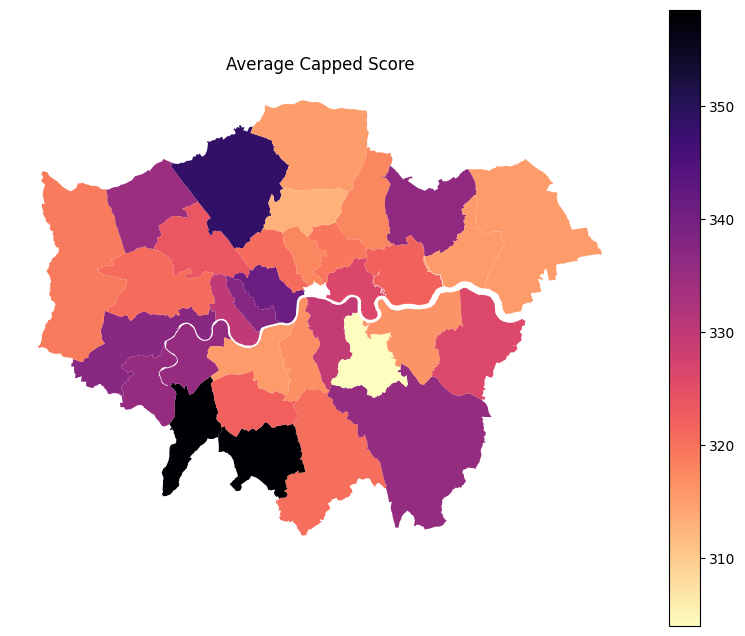

In [46]:
# merge the data with the map data 
choropleth_data_education = map_data.set_index('GSS_CODE').join(education_data.set_index('Code'))

# choropleth for the best performance (Avg_Capped_Score) for each borough
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
choropleth_data_education.plot('Avg_Capped_Score', ax=ax, legend=True, cmap='magma_r')
ax.set_title('Average Capped Score')
ax.axis('off')

# Show plot
plt.show()

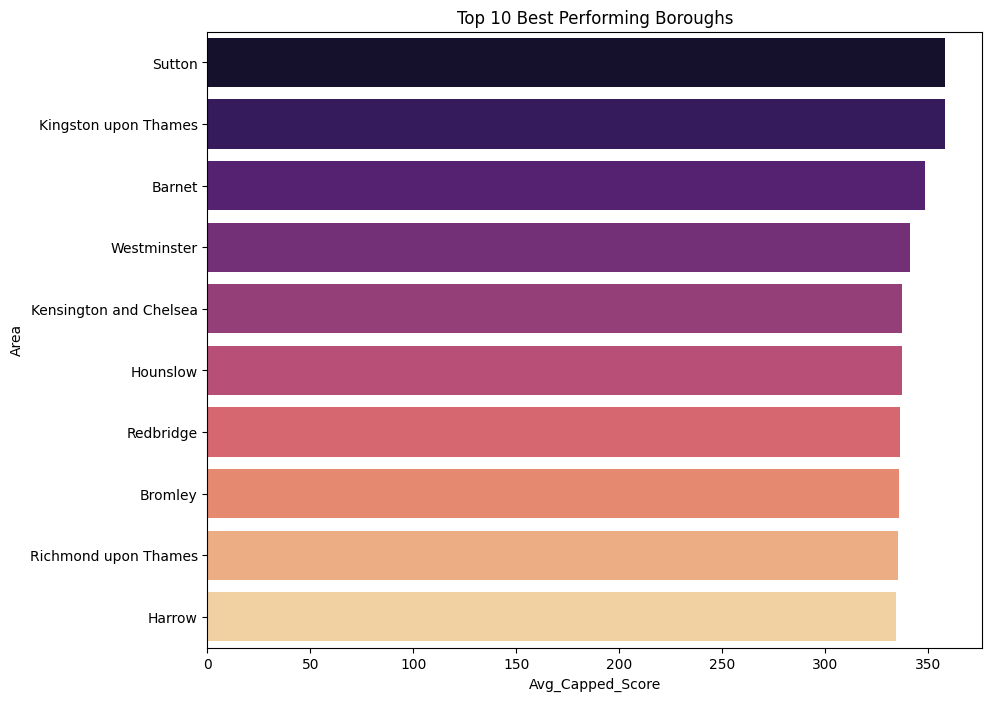

Top Ten Best Performing Boroughs:
                       Area  Avg_Capped_Score
27                  Sutton             358.5
19    Kingston upon Thames             358.2
1                   Barnet             348.5
31             Westminster             341.1
18  Kensington and Chelsea             337.6
16                Hounslow             337.2
24               Redbridge             336.2
4                  Bromley             335.7
25    Richmond upon Thames             335.5
13                  Harrow             334.7


In [47]:
# bar chart for the 10 ten best performing (Avg_Capped_Score) boroughs
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
education_data = education_data.sort_values(by='Avg_Capped_Score', ascending=False)
sns.barplot(x='Avg_Capped_Score', y='Area', data=education_data.head(10), hue='Area', dodge=False, palette='magma')
ax.set_title('Top 10 Best Performing Boroughs')
plt.show()

# print the top 10 best performing boroughs
top_performing = education_data[['Area', 'Avg_Capped_Score']].sort_values(by='Avg_Capped_Score', ascending=False).head(10)
print("Top Ten Best Performing Boroughs:\n", top_performing)

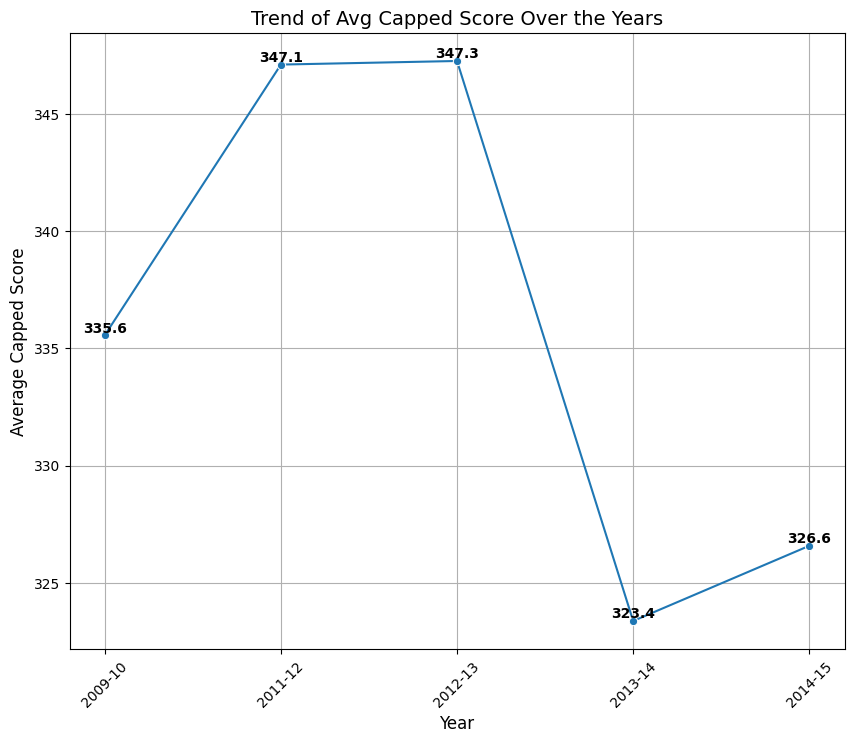

In [48]:
# find the trend of the Avg_Capped_Score over the years
education_data_trend = pd.read_excel('/Users/s16teen/Downloads/Work/UOB/SEM2/ADS2/Tesco_Grocery_and_Educational_Attainment/Data/gcse-results-old.xls', sheet_name=['2009-10', '2011-12', '2012-13', '2013-14', '2014-15'])


# for each sheet, keep only the required columns
for key in education_data_trend.keys():
    education_data_trend[key] = education_data_trend[key].iloc[4:36, :12]
    education_data_trend[key].reset_index(drop=True, inplace=True)
    education_data_trend[key].columns = ['Code', 'Area', 'Num_Pupils', '5+A*-C', '5+A*-C_With_Eng_Maths', '5+A*-G', '5+A*-G_With_Eng_Maths', 'Any_Passes', 'Avg_Capped_Score', 'Avg_Score', 'A*-C_Eng_Maths_Entered', 'A*-C_Eng_Maths_Achieved']

# find the trend of the Avg_Capped_Score over the years
trend = []
for key in education_data_trend.keys():
    avg_score = education_data_trend[key]['Avg_Capped_Score'].astype(float).mean()
    trend.append(avg_score)

# create the line plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x=list(education_data_trend.keys()), y=trend, ax=ax, marker='o')

for i, value in enumerate(trend):
    ax.text(i, value, f"{value:.1f}", ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

ax.set_title('Trend of Avg Capped Score Over the Years', fontsize=14)
ax.set_ylabel('Average Capped Score', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

In [49]:
# Plot "percentage entered for English & Maths" vs. "percentage achieving A*-C in English & Maths" to see if higher entry rates lead to higher pass rates.
fig = px.scatter(education_data, x='A*-C_Eng_Maths_Entered', y='A*-C_Eng_Maths_Achieved',
                 title='Percentage Entered vs. Percentage Achieved A*-C in English & Maths',
                 labels={'A*-C_Eng_Maths_Entered': 'Percentage Entered', 'A*-C_Eng_Maths_Achieved': 'Percentage Achieved'},
                 )
fig.update_traces(textposition='top center')
fig.show()

### **Literature Review**



Diet/health plays a role in children's educational attainment. Research indicates that both the quality and type of diet can influence academic performance in various ways.

Studies show a clear association between diet quality and academic performance. Children with low quality diets are significantly more likely to underperform academically when compared to children that have higher quality diets [10]. Moderate associations exist between dietary intake measured by how ofter the student eats breakfast, how low the intakes of energy-dense, nutrient-poor foods are and overall diet quality of the student, and respect to outcomes of academic achievement. Regular breakfast consumption and overall meal patterns are positively associated with academic achievement. Skipping breakfast or having irregular meal patterns can negatively affect school performance [11]. 

High consumption of "junk food", such as sweets and soft drinks, is directly linked to lower academic achievement, especially in subjects like Maths and English [12]. Early childhood eating patterns, especially those high in unhealthy foods, have a lasting negative impact on educational attainment. This effect persists even when accounting for changes in diet later in childhood [13].

Overall, diet, and by correlation shopping patterns, significantly affects educational attainment in children. Healthier diets are associated with better academic performance, while poor dietary habits, particularly high consumption of unhealthy foods, are linked to lower achievement.

*Limitations:*
- Addressing socioeconomic disparities in diet quality could further enhance educational outcomes.

- Self-reported dietary data may be subject to bias or inaccuracies.

- Studies may not fully account for genetic and psychological factors affecting learning.

### **Grocery Buying Patterns and Educational Attainment**

In [50]:
# merge the grocery data with the education data
grocery_education_data = grocery_data.set_index('area_id').join(education_data.set_index('Code'))

# remove the row for City of London
grocery_education_data = grocery_education_data.dropna()

# remove some of the columns we created for EDA
columns_to_remove = ['NAME', 'junk_food', 'healthy_food', 'avg_transactions_per_day', 'fem_ratio', 'people_per_sq_km', 'representativeness_norm']
grocery_education_data = grocery_education_data.drop(columns=columns_to_remove)

# check missing values
grocery_education_data.isnull().sum().sum()
    

np.int64(0)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


# Define input and target variables
#x = grocery_education_data.drop(columns=["Area", "Num_Pupils", "5+A*-C", "5+A*-C_With_Eng_Maths", '5+A*-G', "5+A*-G_With_Eng_Maths", "Any_Passes", "Avg_Capped_Score", "Avg_Score", "A*-C_Eng_Maths_Entered", "A*-C_Eng_Maths_Achieved"])
#x = grocery_education_data[['f_dairy', 'f_eggs', 'f_fats_oils', 'f_fish', 'f_fruit_veg', 'f_grains', 'f_meat_red', 'f_poultry', 'f_readymade', 'f_sauces', 'f_soft_drinks', 'f_sweets', 'f_tea_coffee', 'f_water']]
#x = grocery_education_data[['fat', 'saturate', 'salt', 'sugar', 'protein', 'carb', 'fibre']]
x = grocery_education_data[['fat', 'saturate', 'salt', 'sugar', 'protein', 'carb', 'fibre', 'f_dairy', 'f_eggs', 'f_fats_oils', 'f_fish', 'f_fruit_veg', 'f_grains', 'f_meat_red', 'f_poultry', 'f_readymade', 'f_sauces', 'f_soft_drinks', 'f_sweets', 'f_tea_coffee', 'f_water']]
#x = grocery_education_data[['f_soft_drinks', 'f_sweets']]
y = grocery_education_data['Avg_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.0631289290272341


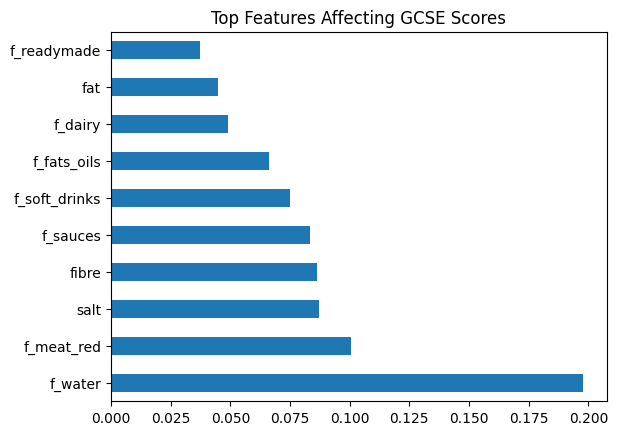

In [52]:
# Get feature importance
importances = model.feature_importances_
feature_names = x.columns

# Plot feature importance
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top Features Affecting GCSE Scores")
plt.show()

                fat  saturate      salt      sugar   protein       carb  \
area_id                                                                   
E09000002  9.209959  3.596834  0.603081  10.793244  5.193872  19.784988   
E09000003  8.594464  3.407353  0.567211   9.530548  5.129627  17.025950   
E09000004  9.119180  3.466346  0.591326  10.941085  5.304496  19.997105   
E09000005  8.962466  3.559913  0.570477  10.148610  5.132915  18.726476   
E09000006  9.123054  3.556924  0.563583  11.218737  5.226795  19.175528   
E09000007  8.801149  3.503451  0.540383   9.426071  5.234502  16.306470   
E09000008  9.093330  3.529783  0.567815  10.969373  5.175919  19.016231   
E09000009  9.012152  3.588559  0.584657   9.602238  5.368475  17.213207   
E09000010  8.890419  3.521348  0.623143   9.947049  5.480699  18.567564   
E09000011  8.930749  3.448167  0.613305   9.763085  5.360270  18.366071   
E09000012  8.946848  3.477629  0.605351   9.694130  5.273589  17.752442   
E09000013  8.885619  3.50

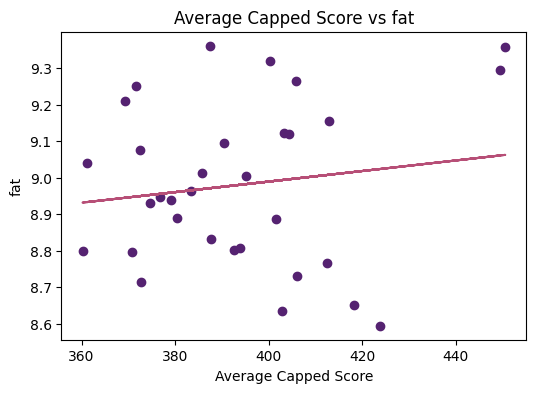

Regression Results for fat:
                            OLS Regression Results                            
Dep. Variable:                    fat   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.096
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.304
Time:                        22:52:32   Log-Likelihood:                 3.7863
No. Observations:                  32   AIC:                            -3.573
Df Residuals:                      30   BIC:                           -0.6412
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept   

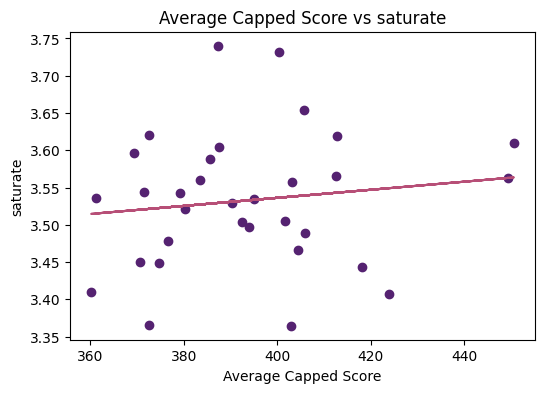

Regression Results for saturate:
                            OLS Regression Results                            
Dep. Variable:               saturate   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9836
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.329
Time:                        22:52:32   Log-Likelihood:                 32.353
No. Observations:                  32   AIC:                            -60.71
Df Residuals:                      30   BIC:                            -57.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Interce

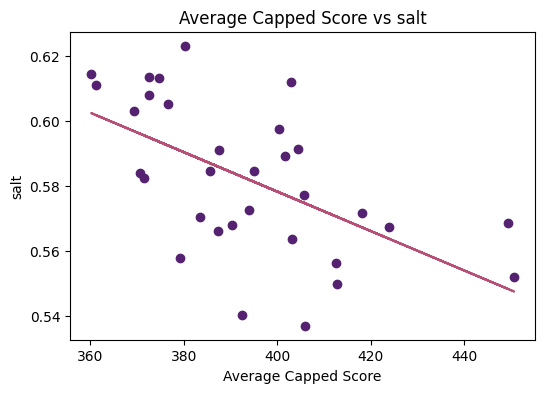

Regression Results for salt:
                            OLS Regression Results                            
Dep. Variable:                   salt   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     13.85
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           0.000816
Time:                        22:52:32   Log-Likelihood:                 81.220
No. Observations:                  32   AIC:                            -158.4
Df Residuals:                      30   BIC:                            -155.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept  

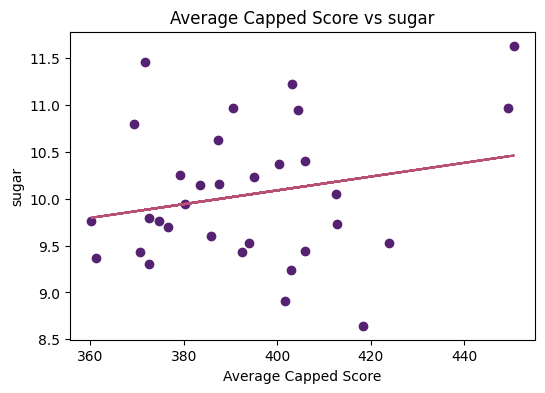

Regression Results for sugar:
                            OLS Regression Results                            
Dep. Variable:                  sugar   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.630
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.212
Time:                        22:52:32   Log-Likelihood:                -34.271
No. Observations:                  32   AIC:                             72.54
Df Residuals:                      30   BIC:                             75.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept 

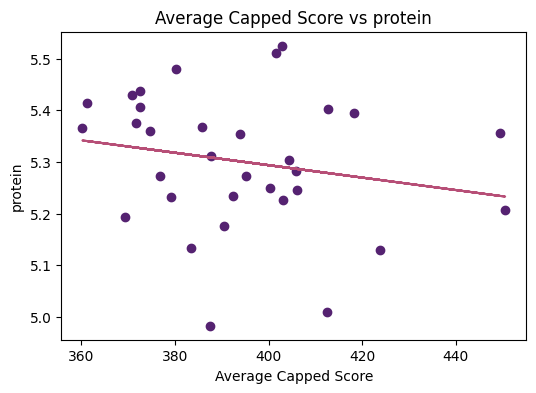

Regression Results for protein:
                            OLS Regression Results                            
Dep. Variable:                protein   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.789
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.191
Time:                        22:52:32   Log-Likelihood:                 21.142
No. Observations:                  32   AIC:                            -38.28
Df Residuals:                      30   BIC:                            -35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercep

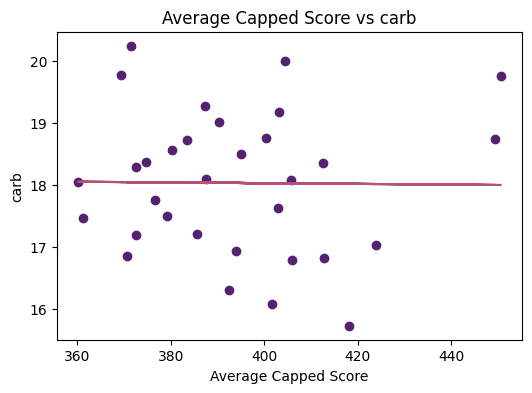

Regression Results for carb:
                            OLS Regression Results                            
Dep. Variable:                   carb   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                 0.0003000
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.986
Time:                        22:52:33   Log-Likelihood:                -49.708
No. Observations:                  32   AIC:                             103.4
Df Residuals:                      30   BIC:                             106.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept  

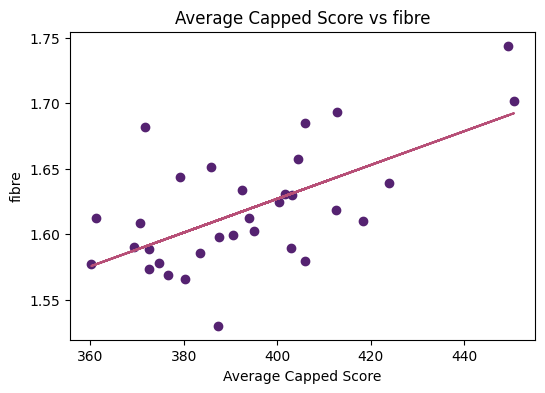

Regression Results for fibre:
                            OLS Regression Results                            
Dep. Variable:                  fibre   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     17.58
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           0.000224
Time:                        22:52:33   Log-Likelihood:                 61.037
No. Observations:                  32   AIC:                            -118.1
Df Residuals:                      30   BIC:                            -115.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept 

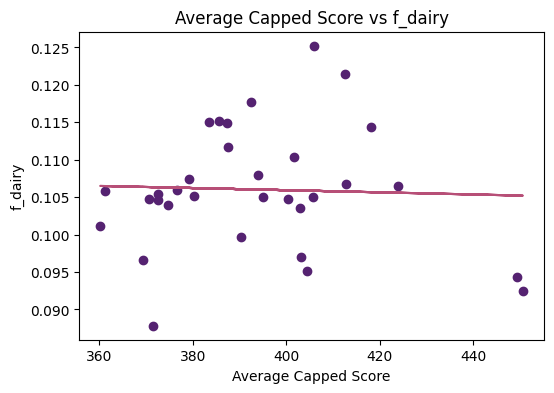

Regression Results for f_dairy:
                            OLS Regression Results                            
Dep. Variable:                f_dairy   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                   0.03511
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.853
Time:                        22:52:33   Log-Likelihood:                 108.42
No. Observations:                  32   AIC:                            -212.8
Df Residuals:                      30   BIC:                            -209.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercep

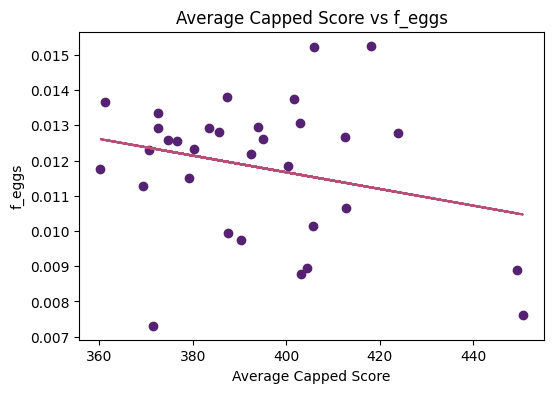

Regression Results for f_eggs:
                            OLS Regression Results                            
Dep. Variable:                 f_eggs   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.540
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.224
Time:                        22:52:33   Log-Likelihood:                 154.82
No. Observations:                  32   AIC:                            -305.6
Df Residuals:                      30   BIC:                            -302.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept

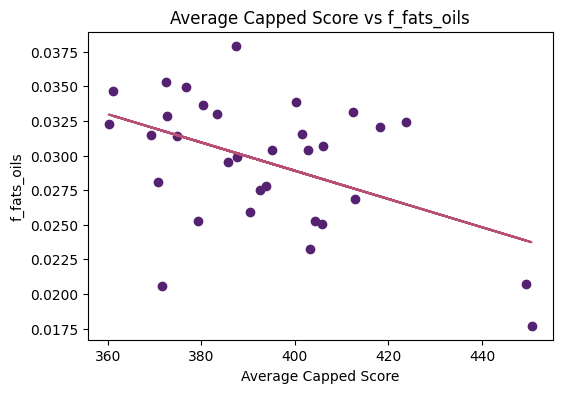

Regression Results for f_fats_oils:
                            OLS Regression Results                            
Dep. Variable:            f_fats_oils   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     6.758
Date:                Sun, 09 Mar 2025   Prob (F-statistic):             0.0143
Time:                        22:52:33   Log-Likelihood:                 129.73
No. Observations:                  32   AIC:                            -255.5
Df Residuals:                      30   BIC:                            -252.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Inte

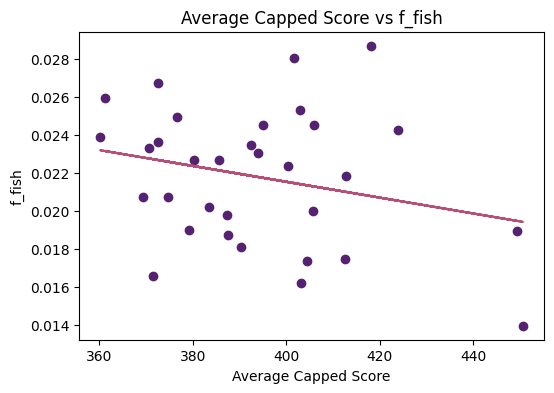

Regression Results for f_fish:
                            OLS Regression Results                            
Dep. Variable:                 f_fish   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.655
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.208
Time:                        22:52:33   Log-Likelihood:                 136.21
No. Observations:                  32   AIC:                            -268.4
Df Residuals:                      30   BIC:                            -265.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept

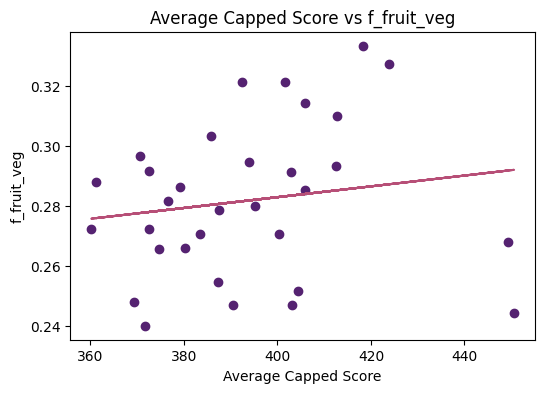

Regression Results for f_fruit_veg:
                            OLS Regression Results                            
Dep. Variable:            f_fruit_veg   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.7528
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.392
Time:                        22:52:33   Log-Likelihood:                 72.727
No. Observations:                  32   AIC:                            -141.5
Df Residuals:                      30   BIC:                            -138.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Inte

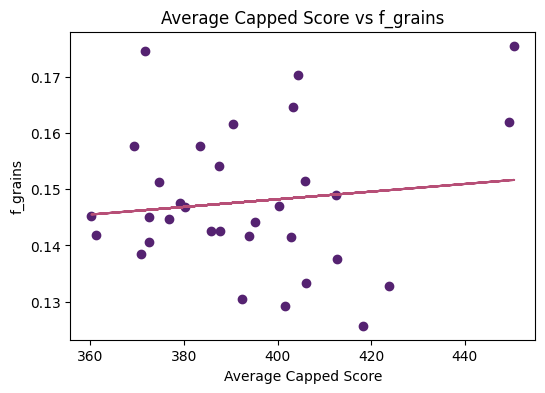

Regression Results for f_grains:
                            OLS Regression Results                            
Dep. Variable:               f_grains   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.3725
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.546
Time:                        22:52:33   Log-Likelihood:                 95.214
No. Observations:                  32   AIC:                            -186.4
Df Residuals:                      30   BIC:                            -183.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Interce

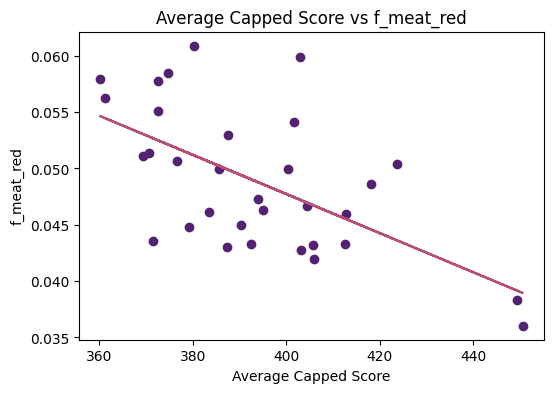

Regression Results for f_meat_red:
                            OLS Regression Results                            
Dep. Variable:             f_meat_red   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     17.21
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           0.000253
Time:                        22:52:33   Log-Likelihood:                 124.20
No. Observations:                  32   AIC:                            -244.4
Df Residuals:                      30   BIC:                            -241.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Inter

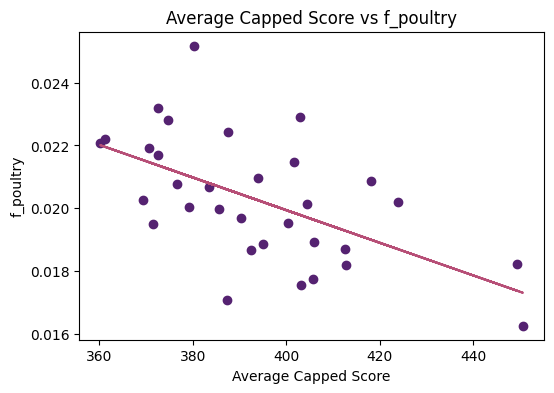

Regression Results for f_poultry:
                            OLS Regression Results                            
Dep. Variable:              f_poultry   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     17.15
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           0.000259
Time:                        22:52:33   Log-Likelihood:                 161.24
No. Observations:                  32   AIC:                            -318.5
Df Residuals:                      30   BIC:                            -315.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Interc

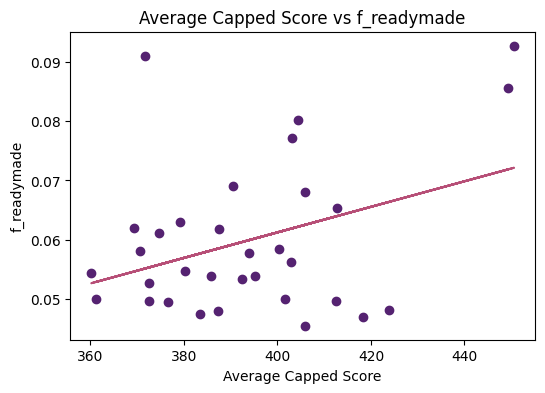

Regression Results for f_readymade:
                            OLS Regression Results                            
Dep. Variable:            f_readymade   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     3.609
Date:                Sun, 09 Mar 2025   Prob (F-statistic):             0.0671
Time:                        22:52:33   Log-Likelihood:                 96.038
No. Observations:                  32   AIC:                            -188.1
Df Residuals:                      30   BIC:                            -185.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Inte

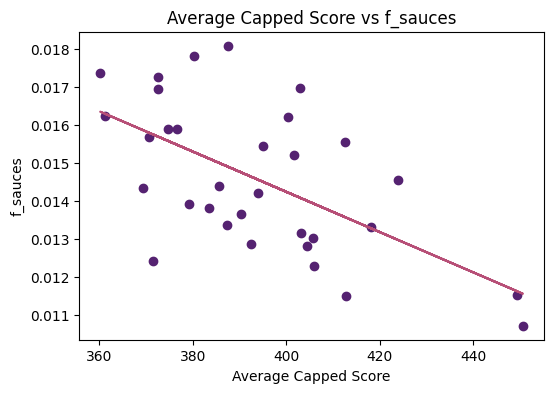

Regression Results for f_sauces:
                            OLS Regression Results                            
Dep. Variable:               f_sauces   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     15.86
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           0.000401
Time:                        22:52:33   Log-Likelihood:                 161.28
No. Observations:                  32   AIC:                            -318.6
Df Residuals:                      30   BIC:                            -315.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Interce

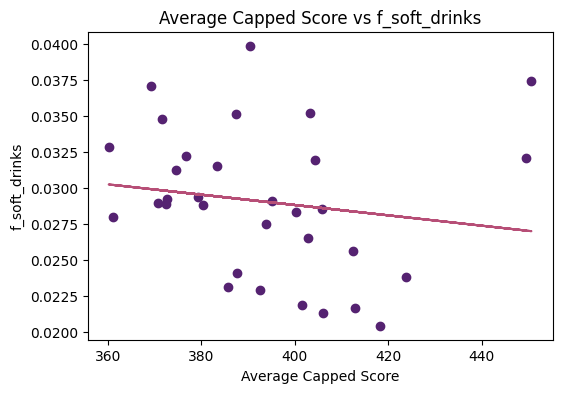

Regression Results for f_soft_drinks:
                            OLS Regression Results                            
Dep. Variable:          f_soft_drinks   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.6305
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.433
Time:                        22:52:33   Log-Likelihood:                 124.46
No. Observations:                  32   AIC:                            -244.9
Df Residuals:                      30   BIC:                            -242.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
In

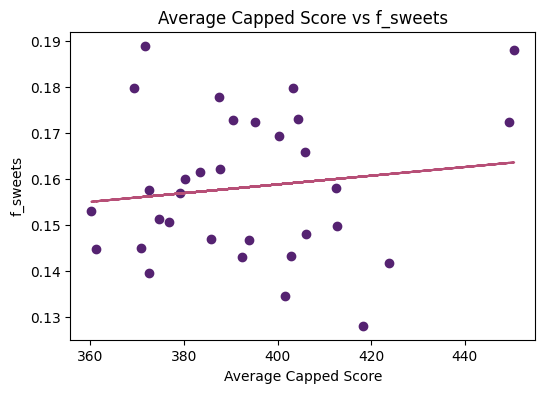

Regression Results for f_sweets:
                            OLS Regression Results                            
Dep. Variable:               f_sweets   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.6579
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.424
Time:                        22:52:33   Log-Likelihood:                 88.284
No. Observations:                  32   AIC:                            -172.6
Df Residuals:                      30   BIC:                            -169.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Interce

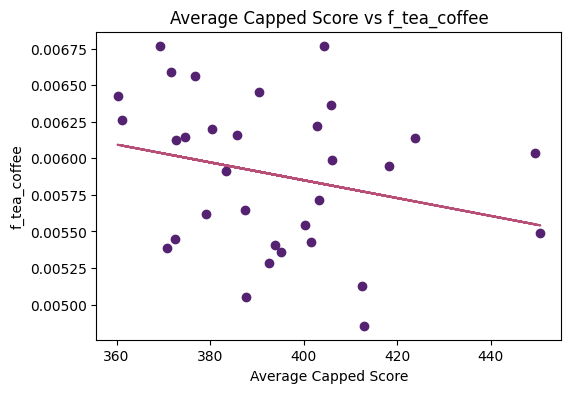

Regression Results for f_tea_coffee:
                            OLS Regression Results                            
Dep. Variable:           f_tea_coffee   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.444
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.239
Time:                        22:52:33   Log-Likelihood:                 198.02
No. Observations:                  32   AIC:                            -392.0
Df Residuals:                      30   BIC:                            -389.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Int

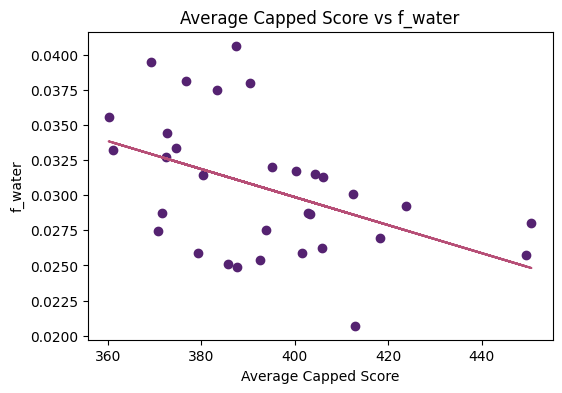

Regression Results for f_water:
                            OLS Regression Results                            
Dep. Variable:                f_water   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     5.637
Date:                Sun, 09 Mar 2025   Prob (F-statistic):             0.0242
Time:                        22:52:33   Log-Likelihood:                 128.40
No. Observations:                  32   AIC:                            -252.8
Df Residuals:                      30   BIC:                            -249.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercep

In [53]:
from statsmodels.formula.api import ols

print(x)

for var in x:
    plt.figure(figsize=(6, 4))

    # Scatter plot with specified dot color
    plt.scatter(y, grocery_education_data[var], color="#552271")

    # Regression line with specified color
    m, b = np.polyfit(y, grocery_education_data[var], 1)
    plt.plot(y, m * y + b, color="#b74f77")

    # Labels and title
    plt.xlabel('Average Capped Score')
    plt.ylabel(var)
    plt.title(f'Average Capped Score vs {var}')
    
    # Show the plot
    plt.show()

    # Run regression analysis
    model = ols(f'{var} ~ Avg_Capped_Score', data=grocery_education_data).fit()
    print(f"Regression Results for {var}:")
    print(model.summary())
    print("\n")

## References

1. Aiello, Luca Maria (2020). Area-level grocery purchases. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7796666.v1

2. Greater London Authority (GLA), (2014) 'Statistical GIS Boundary Files for London'. Available at: https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london.

3. Greater London Authority (GLA), (2018) 'GCSE Results by Borough (Old Grading System)'. Available at: https://data.london.gov.uk/dataset/gcse-results-by-borough--old-grading-system-

4. Aiello, L.M., Quercia, D., Schifanella, R. et al. Tesco Grocery 1.0, a large-scale dataset of grocery purchases in London. Sci Data 7, 57 (2020). https://doi.org/10.1038/s41597-020-0397-7

5. Lim, S., 2018. Eating a balanced diet: a healthy life through a balanced diet in the age of longevity. Journal of obesity & metabolic syndrome, 27(1), p.39.

6. Barefoot, J.C., Grønbæk, M., Feaganes, J.R., McPherson, R.S., Williams, R.B. and Siegler, I.C., 2002. Alcoholic beverage preference, diet, and health habits in the UNC Alumni Heart Study. The American journal of clinical nutrition, 76(2), pp.466-472.

7. Spence, C., 2021. Explaining seasonal patterns of food consumption. International journal of gastronomy and food science, 24, p.100332.

8. Van Der Toorn, J. E., Cepeda, M., Kiefte-de Jong, J. C., Franco, O. H., Voortman, T., & Schoufour, J. D. (2020). Seasonal variation of diet quality in a large middle-aged and elderly Dutch population-based cohort. European journal of nutrition, 59(2), 493–504. https://doi.org/10.1007/s00394-019-01918-5

9. Gengler, D., Yuan, V. and Vigneau, F. (2020) A deeper look at the Tesco dataset using Food Categories, P-ADA-WAN Tesco Data Story. Available at: https://p-ada-wan.github.io/ (Accessed: 19 February 2025).

10. Florence, M.D., Asbridge, M. and Veugelers, P.J., 2008. Diet quality and academic performance. Journal of school health, 78(4), pp.209-215.

11. Spronk, I., Kullen, C., Burdon, C. and O'Connor, H., 2014. Relationship between nutrition knowledge and dietary intake. British journal of nutrition, 111(10), pp.1713-1726.

12. Bleiweiss-Sande, R., Chui, K., Wright, C., Amin, S., Anzman‐Frasca, S., & Sacheck, J., 2019. Associations between Food Group Intake, Cognition, and Academic Achievement in Elementary Schoolchildren. Nutrients, 11. https://doi.org/10.3390/nu11112722.

13. Feinstein, L., Sabates, R., Sorhaindo, A., Rogers, I., Herrick, D., Northstone, K., & Emmett, P., 2008. Dietary patterns related to attainment in school: the importance of early eating patterns. Journal of Epidemiology & Community Health, 62, pp. 734 - 739. https://doi.org/10.1136/jech.2007.068213.

14. Khan, N., Raine, L., Drollette, E., Scudder, M., Kramer, A., & Hillman, C., 2015. Dietary fiber is positively associated with cognitive control among prepubertal children.. The Journal of nutrition, 145 1, pp. 143-9 . https://doi.org/10.3945/jn.114.198457.

15. Nyaradi, A., Foster, J.K., Hickling, S., Li, J., Ambrosini, G.L., Jacques, A. and Oddy, W.H., 2014. Prospective associations between dietary patterns and cognitive performance during adolescence. Journal of Child Psychology and Psychiatry, 55(9), pp.1017-1024.